In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/kaggle/input/automobile/Automobile.csv')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: >

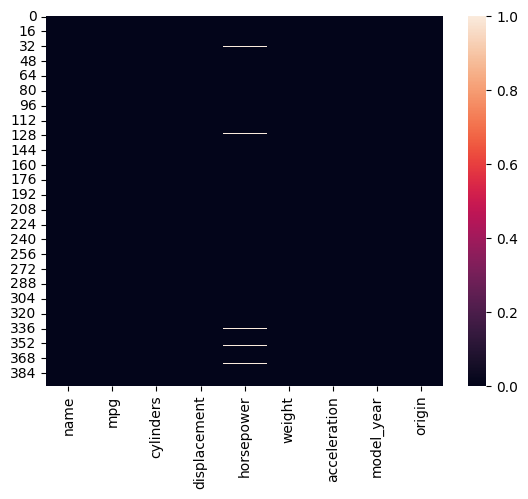

In [10]:
sns.heatmap(df.isna())

In [11]:
df = df.dropna(subset=['horsepower'])

In [12]:
pd.DataFrame(df.isnull().sum()).T

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,0,0,0,0,0,0,0,0,0


In [13]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize= (9,6))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    #print(unique)
    count = unique.values
    categories = unique.index
    plt.pie(count,labels= categories, startangle= 90,autopct= '%1d%%' )
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

<Figure size 900x600 with 0 Axes>

<Axes: >

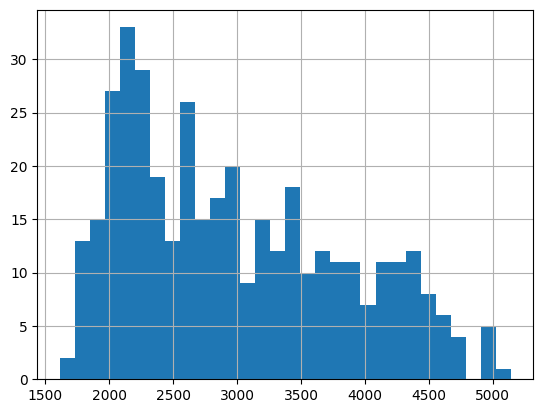

In [14]:
df['weight'].hist(bins=30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='model_year', ylabel='Count'>

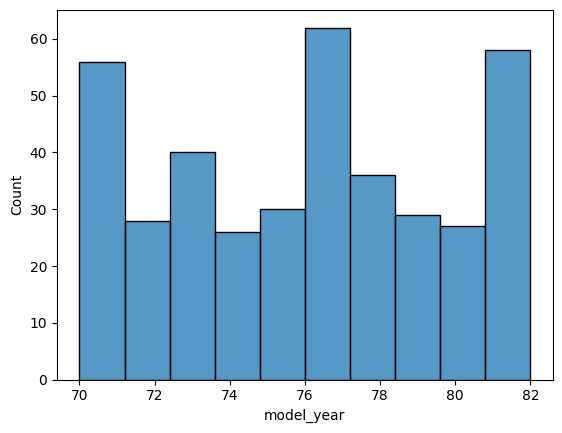

In [15]:
sns.histplot(df['model_year'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='horsepower', ylabel='Density'>

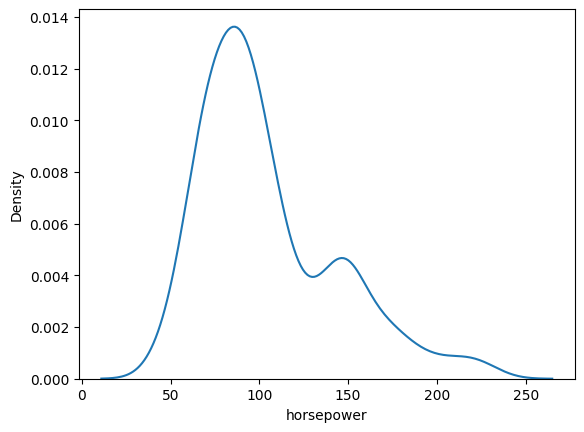

In [16]:
pd.option_context('mode.use_inf_as_na', True)
sns.kdeplot(df["horsepower"])

horsepower  46.0       48.0   49.0   52.0   53.0   54.0   58.0   60.0   61.0   \
cylinders                                                                       
3             NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4            71.5  79.333333   73.0   77.5   75.5   72.0   79.0   77.2   74.0   
5             NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6             NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8             NaN        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

horsepower  62.0   ...  190.0  193.0  198.0  200.0  208.0  210.0  215.0  \
cylinders          ...                                                    
3             NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4            80.5  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5             NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6             NaN  ...    NaN    NaN    NaN    NaN    NaN

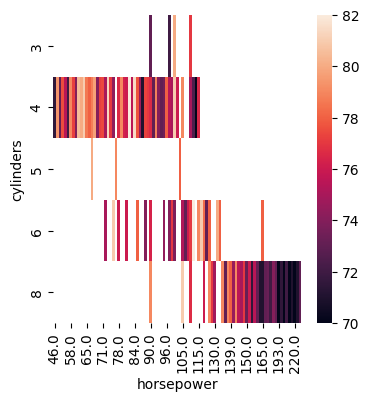

In [17]:
plt.figure(figsize=(4,4))
agg= df.pivot_table(index="cylinders", columns="horsepower", values="model_year")
print(agg)
sns.heatmap(agg)
plt.show()

<Axes: xlabel='cylinders', ylabel='count'>

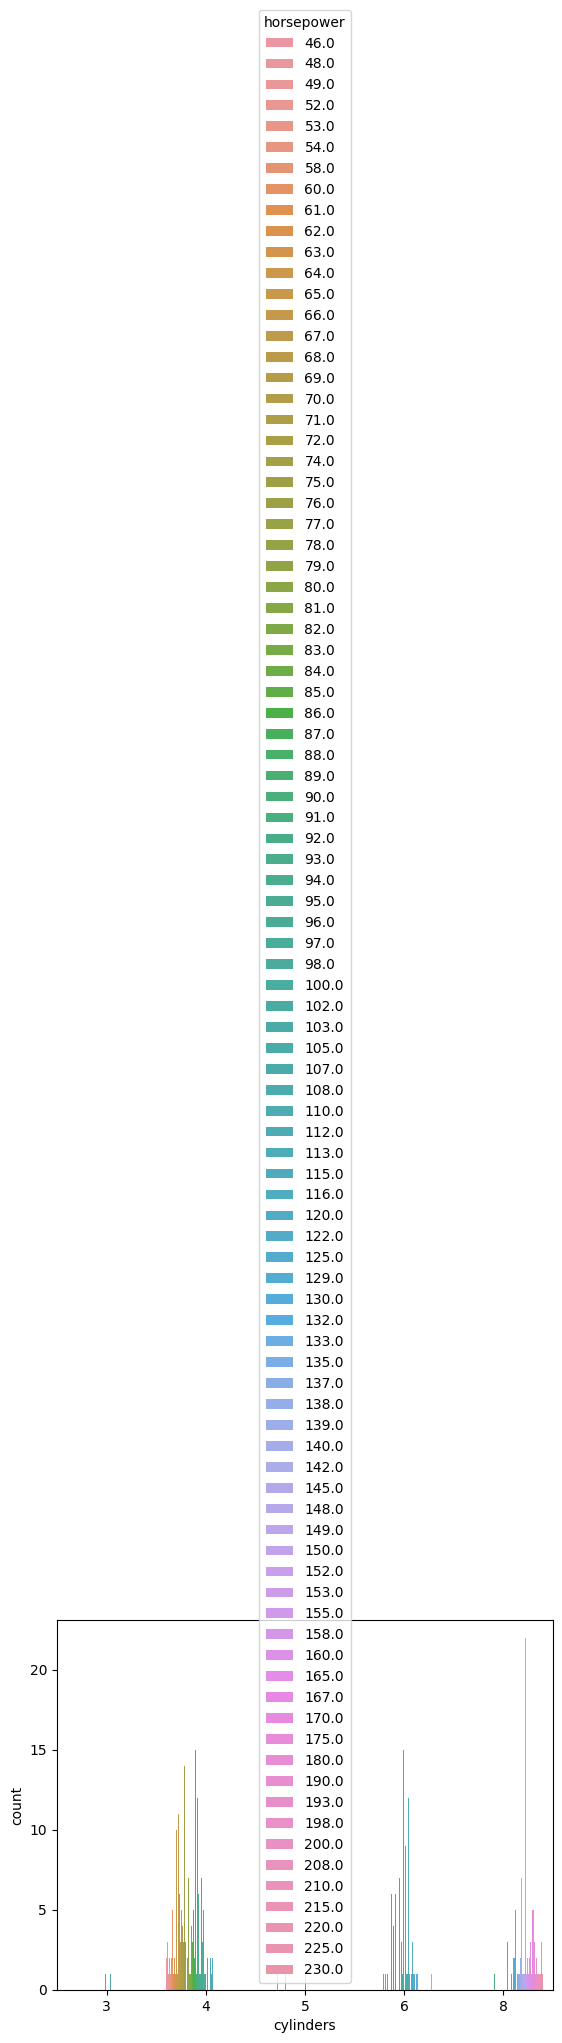

In [18]:
sns.countplot(x='cylinders',hue ='horsepower', data=df)

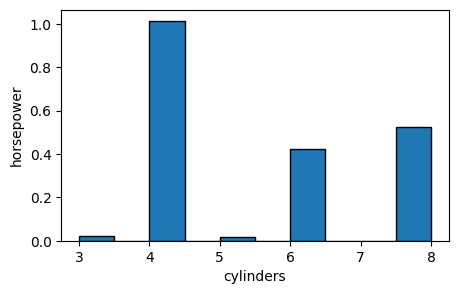

In [19]:
plt.figure(figsize=(5,3))
plt.hist(df['cylinders'], density=True, edgecolor = "black")
plt.xlabel('cylinders')
plt.ylabel('horsepower')
plt.show()